In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# set dataset path for easier use in future

train = "../datasets/eda/train.csv"
test = "../datasets/eda/test.csv"

In [7]:
df = pd.read_csv(train)

In [8]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## **Why do EDA**

- Model building: Until we don't know what does the columns of our data means we cannot create a good model. So EDA helps us to understand our data better.

- Analysis and reporting

- Validate assumptions: to test our assumption on our data

- Handling missing values

- Feature engineering: The columns which will help in predictions. Sometimes we need to make custom columns, modifying current columns. eda will help to understand this what type of feature engineering needs to be done.

- Detecting outlier

**It is and Iterative Process**


## **Step 1: Understand Labels of Our Columns**

**Column Types in our Data**

- `Numerical` - Age,Fare,PassengerId
- `Categorical` - Survived, Pclass, Sex, SibSp, Parch,Embarked
- `Mixed` - Name, Ticket, Cabin

If small then we can done manually.

If larege then we can run info or loop to label them


## **Step 2: Perform Univariate Analysis**


**What we can achieve with Univariate Analysis**

Univariate analysis focuses on analyzing each feature(column) in the dataset independently.

- **Distribution analysis**: The distribution of each feature is examined to identify its shape, central tendency, and dispersion.

- **Identifying potential issues**: Univariate analysis helps in identifying potential problems with the data such as outliers, skewness, and missing values


**The shape of a data distribution refers to its overall pattern or form as it is represented on a graph. Some common shapes of data distributions include:**

- `Normal Distribution`: A symmetrical and bell-shaped distribution where the mean, median, and mode are equal and the majority of the data falls in the middle of the distribution with gradually decreasing frequencies towards the tails.

- `Skewed Distribution`: A distribution that is not symmetrical, with one tail being longer than the other. It can be either positively skewed (right-skewed) or negatively skewed (left-skewed).

- `Bimodal Distribution`: A distribution with two peaks or modes.

- `Uniform Distribution`: A distribution where all values have an equal chance of occurring.

The shape of the data distribution is important in identifying the presence of outliers, skewness, and the type of statistical tests and models that can be used for further analysis.


**_Dispersion_ is a statistical term used to describe the spread or variability of a set of data. It measures how far the values in a data set are spread out from the central tendency (mean, median, or mode) of the data.**

There are several measures of dispersion, including:

- `Range`: The difference between the largest and smallest values in a data set.

- `Variance`: The average of the squared deviations of each value from the mean of the data set.

- `Standard Deviation`: The square root of the variance. It provides a measure of the spread of the data that is in the same units as the original data.

- `Interquartile range (IQR)`: The range between the first quartile (25th percentile) and the third quartile (75th percentile) of the data.

Dispersion helps to describe the spread of the data, which can help to identify the presence of outliers and skewness in the data.


#### **Steps of doing Univariate Analysis on Numerical columns**

- `Descriptive Statistics`: Compute basic summary statistics for the column, such as mean, median, mode, standard deviation, range, and quartiles. These statistics give a general understanding of the distribution of the data and can help identify skewness or outliers.

- `Visualizations`: Create visualizations to explore the distribution of the data. Some common visualizations for numerical data include histograms, box plots, and density plots. These visualizations provide a visual representation of the distribution of the data and can help identify skewness an outliers.

- `Identifying Outliers`: Identify and examine any outliers in the data. Outliers can be identified using visualizations. It is important to determine whether the outliers are due to measurement errors, data entry errors, or legitimate differences in the data, and to decide whether to include or exclude them from the analysis.

- `Skewness`: Check for skewness in the data and consider transforming the data or using robust statistical methods that are less sensitive to skewness, if necessary.

- `Conclusion`: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


We have three numerical columns Age,Fare,PassengerId.

Out of which passenger id is not relatable


**Age**

_conclusions_

- Age is normally(almost) distributed
- 20% of the values are missing
- There are some outliers


In [10]:
# get statistical info about age

df["Age"].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

<Axes: ylabel='Frequency'>

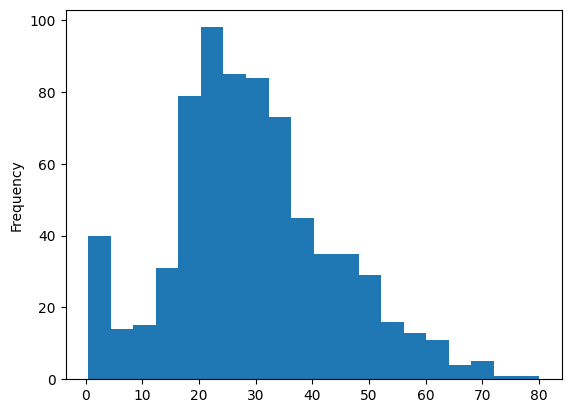

In [13]:
# df['Age'].plot(kind='hist')
df["Age"].plot(kind="hist", bins=20)

<Axes: ylabel='Density'>

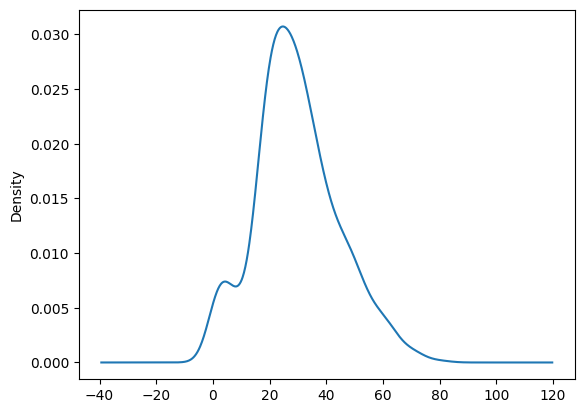

In [15]:
df["Age"].plot(kind="kde")

Now this is not perfectly normal, but neither that skewed


In [16]:
#  we can calculate skewness of a column

df["Age"].skew()

np.float64(0.38910778230082704)

**Closer to zero means closer to normal**

**More Positive means Positively Skewed**

**More Negative means Negatively Skewed**


<Axes: >

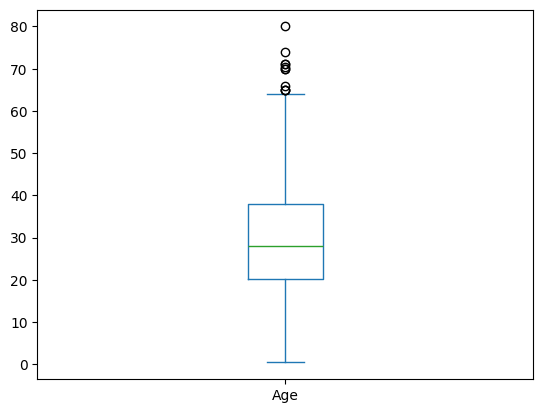

In [17]:
df["Age"].plot(kind="box")

In [20]:
# now we can check outliers

df[df["Age"] > 65]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,NaN,S
96,97,0,1,"Goldschmidt, Mr. George B",male,71.0,0,0,PC 17754,34.6542,A5,C
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
493,494,0,1,"Artagaveytia, Mr. Ramon",male,71.0,0,0,PC 17609,49.5042,NaN,C
630,631,1,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,0,0,27042,30.0000,A23,S
672,673,0,2,"Mitchell, Mr. Henry Michael",male,70.0,0,0,C.A. 24580,10.5000,NaN,S
745,746,0,1,"Crosby, Capt. Edward Gifford",male,70.0,1,1,WE/P 5735,71.0000,B22,S
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S


In [21]:
# check total null values

df["Age"].isnull().sum()

np.int64(177)

In [24]:
# in terms of percentage

(df["Age"].isnull().sum() / len(df["Age"])) * 100

np.float64(19.865319865319865)

**Fare**

_conclusions_

- The data is highly(positively) skewed
- Fare col actually contains the group fare and not the individual fare(This might be an issue)
- We need to create a new col called individual fare


In [25]:
df["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: ylabel='Frequency'>

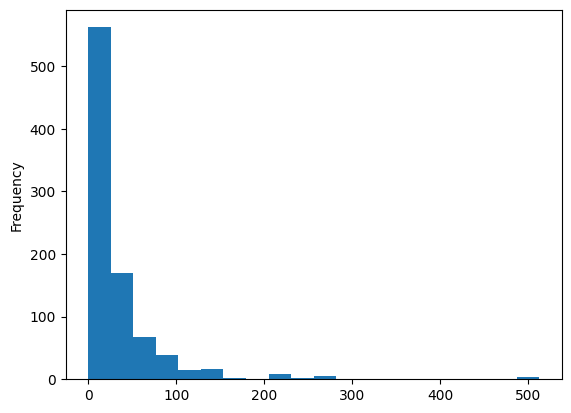

In [28]:
df["Fare"].plot(kind="hist", bins=20)

<Axes: ylabel='Density'>

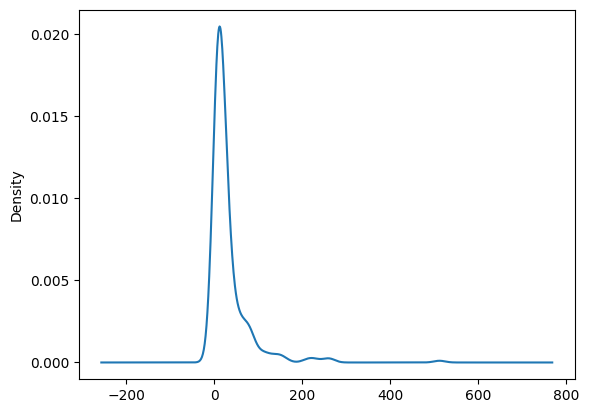

In [29]:
df["Fare"].plot(kind="kde")

In [30]:
df["Fare"].skew()

np.float64(4.787316519674893)

It is highly positive skewed data


<Axes: >

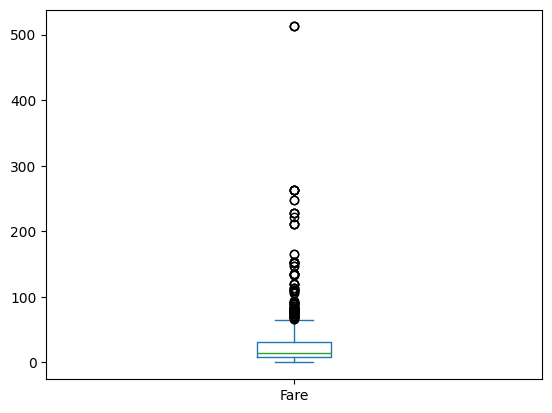

In [31]:
df["Fare"].plot(kind="box")

In [34]:
df[df["Fare"] > 250]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
438,439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.0000,C23 C25 C27,S
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


Now with this study we get to a conclusion that the fare is given for a group fare not individual fare.


In [35]:
df["Fare"].isnull().sum()

np.int64(0)

#### **Steps of doing Univariate Analysis on Categorical columns**

`Descriptive Statistics`: Compute the frequency distribution of the categories in the column. This will give a general understanding of the distribution of the categories and their relative frequencies.

`Visualizations`: Create visualizations to explore the distribution of the categories. Some common visualizations for categorical data include **count plots and pie charts**. These visualizations provide a visual representation of the distribution of the categories and can help identify any patterns or anomalies in the data.

`Missing Values`: Check for missing values in the data and decide how to handle them. Missing values can be imputed or excluded from the analysis, depending on the research question and the data set.

`Conclusion`: Summarize the findings of the EDA and make decisions about how to proceed with further analysis.


We have these categorical columns.

Survived, Pclass, Sex, SibSp, Parch,Embarked


**Survived**

_conclusions_

- Parch and SibSp cols can be merged to form a new col call family_size
- Create a new col called is_alone


In [36]:
df["Survived"].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: xlabel='Survived'>

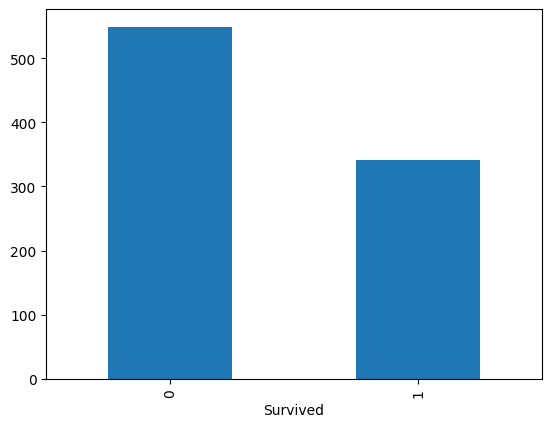

In [38]:
df["Survived"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

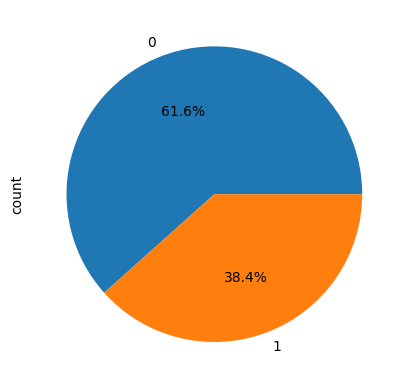

In [39]:
df["Survived"].value_counts().plot(kind="pie", autopct="%0.1f%%")

In [40]:
df["Survived"].isnull().sum()

np.int64(0)

**Pclass**

_conclusions_

- Surprisingly Less people travelled in second class and more people were in 1st class
- We can further dig deeper to it with comparing it with fare price


In [41]:
df["Pclass"].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

<Axes: ylabel='count'>

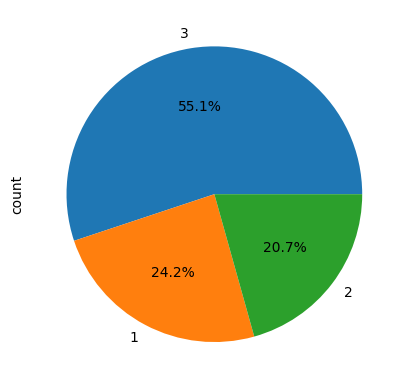

In [42]:
df["Pclass"].value_counts().plot(kind="pie", autopct="%0.1f%%")

In [43]:
df["Pclass"].isnull().sum()

np.int64(0)

**Sex**

_conclusions_

- Male population is generally greater than female population


In [44]:
df["Sex"].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: ylabel='count'>

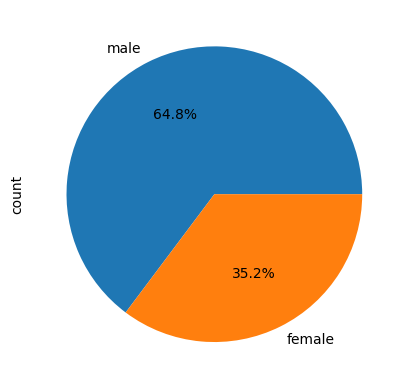

In [45]:
df["Sex"].value_counts().plot(kind="pie", autopct="%0.1f%%")

In [46]:
df["Sex"].isnull().sum()

np.int64(0)

**SibSp**

_conclusions_

- People travelling individually are much higher than the people with siblings
- Parch and SibSp cols can be merged to form a new col call family_size


In [47]:
df["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

<Axes: xlabel='SibSp'>

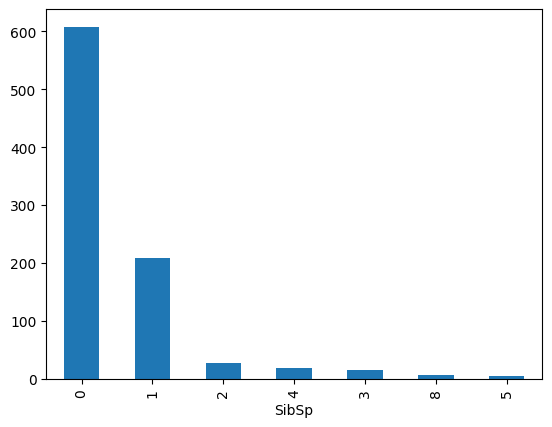

In [48]:
df["SibSp"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

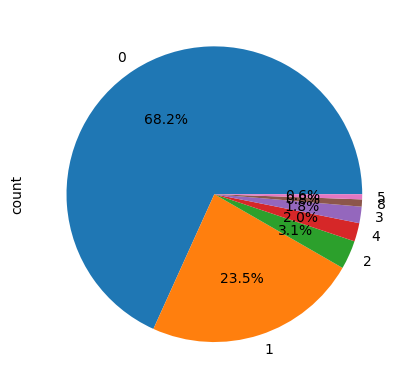

In [49]:
df["SibSp"].value_counts().plot(kind="pie", autopct="%0.1f%%")

In [50]:
df["Sex"].isnull().sum()

np.int64(0)

**Parch**

_conclusions_

- Solo passenger are much higher than with childs
- Maximum family size is 6
- Parch and SibSp cols can be merged to form a new col call family_size


In [51]:
df["Parch"].value_counts()

Parch
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parch'>

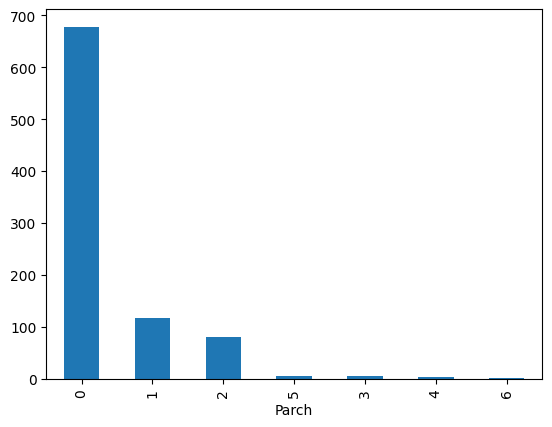

In [52]:
df["Parch"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

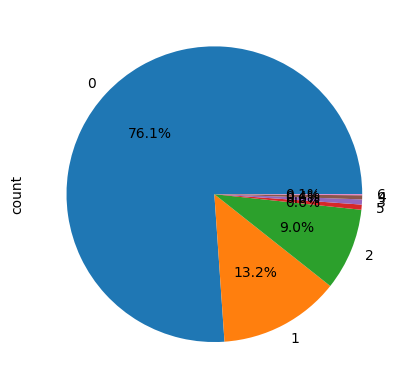

In [53]:
df["Parch"].value_counts().plot(kind="pie", autopct="%0.1f%%")

In [55]:
df["Parch"].isnull().sum()

np.int64(0)

**Embarked**

_conclusions_


In [57]:
df["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

<Axes: xlabel='Embarked'>

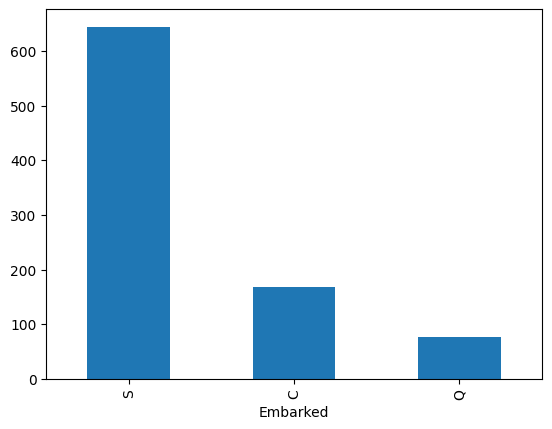

In [58]:
df["Embarked"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

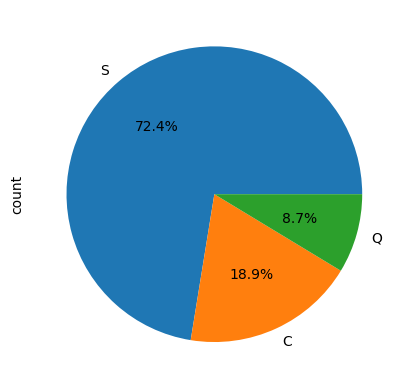

In [56]:
df["Embarked"].value_counts().plot(kind="pie", autopct="%0.1f%%")

#### **Steps of doing Univariate Analysis on Mixed Column**

At this point we cannot do anything further feature engineering will be needed in order to convert those column to a type such as numerical or categorical.


## **Step 2: Perform Bivariate Analysis**


#### **Steps of doing Bivariate Analysis**

- Select 2 cols
- Understand type of relationship between two cols

1. `Numerical - Numerical`:
   - You can plot graphs like scatterplot(regression plots), 2D histplot, 2D KDEplots.
   - Check correlation coefficent to check linear relationship
2. `Numerical - Categorical`:
   - create visualizations that compare the distribution of the numerical data across different categories of the categorical data.
   - You can plot graphs like barplot, boxplot, kdeplot violinplot even scatterplots.
3. `Categorical - Categorical`:
   - You can create cross-tabulations or contingency tables that show the distribution of values in one categorical column, grouped by the values in the other categorical column.
   - You can plots like heatmap, stacked barplots, treemaps.

- Write your conclusions


In [62]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Usually we need to make all bivariate pairs combination, but what if there are 100s of columns.

What we will do is we pick most important feature from our data and check it with other features.

For us it is

- Survived Column
- Age column because it has a missing values


In [65]:
df.groupby(df["Pclass"])["Survived"].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

In [66]:
"""
Survived, Pclass
"""

pd.crosstab(df["Survived"], df["Pclass"])

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [68]:
# in terms of percentage

pd.crosstab(df["Survived"], df["Pclass"], normalize="columns") * 100

Pclass,1,2,3
Survived,,,
0,37.037037,52.717391,75.763747
1,62.962963,47.282609,24.236253


<Axes: xlabel='Pclass', ylabel='Survived'>

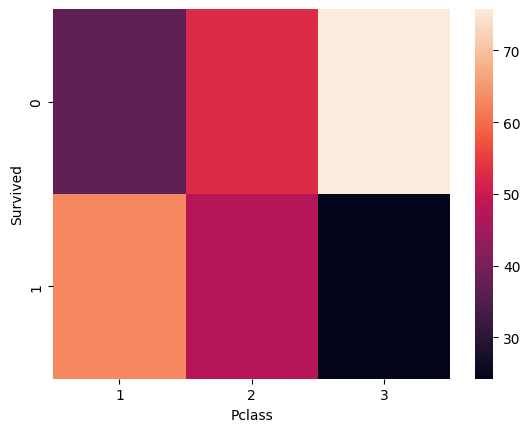

In [69]:
sns.heatmap(pd.crosstab(df["Survived"], df["Pclass"], normalize="columns") * 100)

In [70]:
"""
Survived, Sex
"""

pd.crosstab(df["Survived"], df["Sex"], normalize="columns") * 100

Sex,female,male
Survived,,
0,25.796178,81.109185
1,74.203822,18.890815


<Axes: xlabel='Sex', ylabel='Survived'>

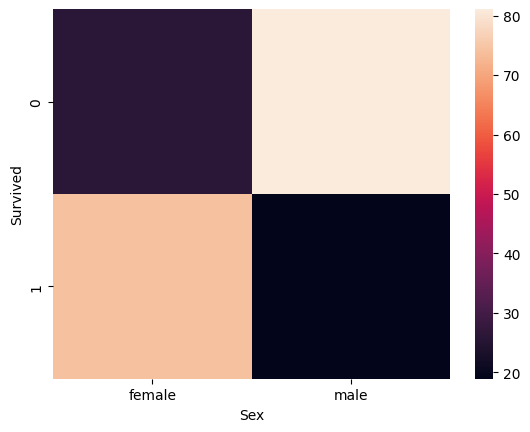

In [71]:
sns.heatmap(pd.crosstab(df["Survived"], df["Sex"], normalize="columns") * 100)

In [72]:
"""
Survived and Embarked
"""

pd.crosstab(df["Survived"], df["Embarked"], normalize="columns") * 100

Embarked,C,Q,S
Survived,,,
0,44.642857,61.038961,66.304348
1,55.357143,38.961039,33.695652


Now we can see that most people which lived are either from Pclass1 or female


In [73]:
pd.crosstab(df["Sex"], df["Embarked"], normalize="columns") * 100

Embarked,C,Q,S
Sex,,,
female,43.452381,46.753247,31.521739
male,56.547619,53.246753,68.478261


In [74]:
pd.crosstab(df["Pclass"], df["Embarked"], normalize="columns") * 100

Embarked,C,Q,S
Pclass,,,
1,50.595238,2.597403,19.720497
2,10.119048,3.896104,25.465839
3,39.285714,93.506494,54.813665


Now from the above reason we can conclude that most people from `C` are from pclass 1 that was the reason they lived


In [75]:
"""
Survived with Numerical Columns: Age
"""

df[df["Survived"] == 1]["Age"]

1      38.0
2      26.0
3      35.0
8      27.0
9      14.0
       ... 
875    15.0
879    56.0
880    25.0
887    19.0
889    26.0
Name: Age, Length: 342, dtype: float64

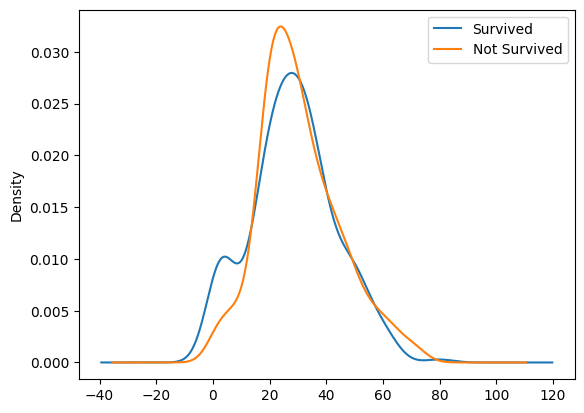

In [78]:
df[df["Survived"] == 1]["Age"].plot(kind="kde", label="Survived")
df[df["Survived"] == 0]["Age"].plot(kind="kde", label="Not Survived")

plt.legend()
plt.show()

In [80]:
print(df[df["Pclass"] == 1]["Age"].mean())

38.233440860215055


## **Feature Engineering**

- Fix the cols and do the analysis again


In [81]:
df["Fare"]

0       7.2500
1      71.2833
2       7.9250
3      53.1000
4       8.0500
        ...   
886    13.0000
887    30.0000
888    23.4500
889    30.0000
890     7.7500
Name: Fare, Length: 891, dtype: float64

This is the group fare we need individual fare from this


In [83]:
df["SibSp"].value_counts()

SibSp
0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: count, dtype: int64

In [85]:
df[df["SibSp"] == 8]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


Family size will be self + parents and child + sibling

Thus the fair amount for individual will be total amount divide by family size

1 + 8 + 2 = 11

but when we are counting based on same ticket we are getting 7 rows that means either the data is missing or rest members may have different tickets.


In [87]:
df[df["Ticket"] == "CA. 2343"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.55,NaN,S
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.55,NaN,S
201,202,0,3,"Sage, Mr. Frederick",male,NaN,8,2,CA. 2343,69.55,NaN,S
324,325,0,3,"Sage, Mr. George John Jr",male,NaN,8,2,CA. 2343,69.55,NaN,S
792,793,0,3,"Sage, Miss. Stella Anna",female,NaN,8,2,CA. 2343,69.55,NaN,S
846,847,0,3,"Sage, Mr. Douglas Bullen",male,NaN,8,2,CA. 2343,69.55,NaN,S
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.55,NaN,S


In [89]:
df[df["Name"].str.contains("Sage")]

PassengerId    8
Survived       8
Pclass         8
Name           8
Sex            8
Age            1
SibSp          8
Parch          8
Ticket         8
Fare           8
Cabin          1
Embarked       8
dtype: int64

**Thus after analyzing this we get to the conclusion that the rest of the members are in testing datasets**


In [ ]:
df2 = pd.read_csv(test)

In [ ]:
df = pd.concat([df, df2])

Now we will have all passengers


In [94]:
df[df["Ticket"] == "CA. 2343"].count()

PassengerId    11
Survived        7
Pclass         11
Name           11
Sex            11
Age             1
SibSp          11
Parch          11
Ticket         11
Fare           11
Cabin           0
Embarked       11
dtype: int64

In [95]:
# Now we can create individual fare

df["Fare"] / (df["SibSp"] + df["Parch"] + 1)  # Plus 1 is self

0        3.625000
1       35.641650
2        7.925000
3       26.550000
4        8.050000
          ...    
413      8.050000
414    108.900000
415      7.250000
416      8.050000
417      7.452767
Length: 1309, dtype: float64

In [ ]:
df["Individual Fare"] = df["Fare"] / (df["SibSp"] + df["Parch"] + 1)

In [97]:
df[["Fare", "Individual Fare"]].describe()

,Fare,Individual Fare
count,1308.000000,1308.000000
mean,33.295479,20.518215
std,51.758668,35.774337
min,0.000000,0.000000
25%,7.895800,7.452767
50%,14.454200,8.512483
75%,31.275000,24.237500
max,512.329200,512.329200


<Axes: >

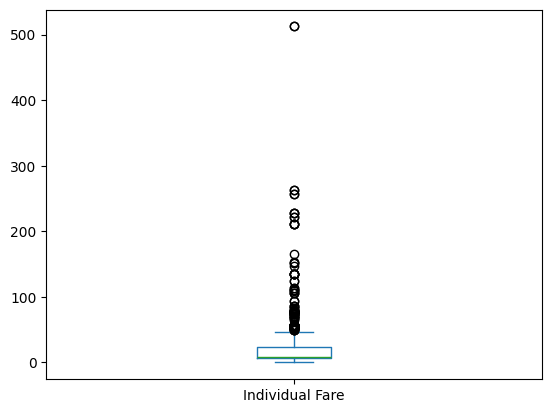

In [100]:
df["Individual Fare"].plot(kind="box")

In [ ]:
# Family Size

df["Family Size"] = df["SibSp"] + df["Parch"] + 1

In [ ]:
"""
Family Type

if family size 1 --> Alone
if family size 2-4 --> small family
if family size >=5 --> Large
"""


def tranform_family(family_size_num):
    if family_size_num == 1:
        return "alone"
    elif family_size_num > 1 and family_size_num < 5:
        return "small"
    else:
        return "large"

In [104]:
df["Family Size"].apply(tranform_family)

0      small
1      small
2      alone
3      small
4      alone
       ...  
413    alone
414    alone
415    alone
416    alone
417    small
Name: Family Size, Length: 1309, dtype: object

In [ ]:
df["Family_type"] = df["Family Size"].apply(tranform_family)

In [106]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual Fare,Family Size,Family_type
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,alone
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,alone


In [107]:
pd.crosstab(df["Survived"], df["Family_type"], normalize="columns") * 100

Family_type,alone,large,small
Survived,,,
0.0,69.646182,83.870968,42.123288
1.0,30.353818,16.129032,57.876712


<Axes: xlabel='Family_type', ylabel='Survived'>

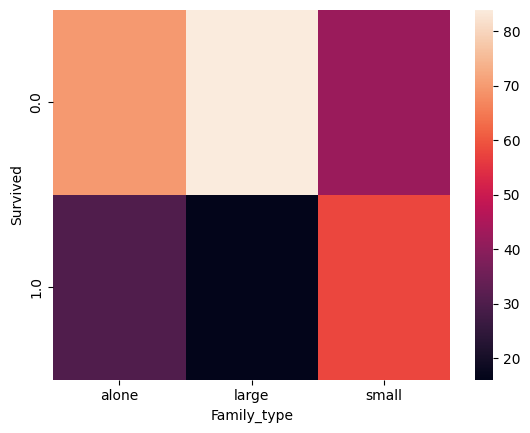

In [108]:
sns.heatmap(pd.crosstab(df["Survived"], df["Family_type"], normalize="columns") * 100)

In [110]:
"""
Feature Engineering on Name based on surname
"""

df["Name"].str.split(",").str.get(0)

0             Braund
1            Cumings
2          Heikkinen
3           Futrelle
4              Allen
           ...      
413          Spector
414    Oliva y Ocana
415          Saether
416             Ware
417            Peter
Name: Name, Length: 1309, dtype: object

In [ ]:
df["Surname"] = df["Name"].str.split(",").str.get(0)

In [112]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Individual Fare,Family Size,Family_type,Surname
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,3.62500,2,small,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35.64165,2,small,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,7.92500,1,alone,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,26.55000,2,small,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,8.05000,1,alone,Allen


In [118]:
df["Name"].str.split(",").str.get(1).str.strip().str.split(" ").str.get(0)

0          Mr.
1         Mrs.
2        Miss.
3         Mrs.
4          Mr.
        ...   
413        Mr.
414      Dona.
415        Mr.
416        Mr.
417    Master.
Name: Name, Length: 1309, dtype: object

In [ ]:
df["Title"] = df["Name"].str.split(",").str.get(1).str.strip().str.split(" ").str.get(0)

In [120]:
df["Title"].value_counts()

Title
Mr.          757
Miss.        260
Mrs.         197
Master.       61
Rev.           8
Dr.            8
Col.           4
Major.         2
Mlle.          2
Ms.            2
Mme.           1
Don.           1
Sir.           1
Lady.          1
Capt.          1
the            1
Jonkheer.      1
Dona.          1
Name: count, dtype: int64

In [121]:
# Replace titles with others

df["Title"] = df["Title"].str.replace("Rev.", "other")
df["Title"] = df["Title"].str.replace("Dr.", "other")
df["Title"] = df["Title"].str.replace("Col.", "other")
df["Title"] = df["Title"].str.replace("Major.", "other")
df["Title"] = df["Title"].str.replace("Don.", "other")
df["Title"] = df["Title"].str.replace("Capt.", "other")
df["Title"] = df["Title"].str.replace("the", "other")
df["Title"] = df["Title"].str.replace("Jonkheer.", "other")

In [122]:
df["Title"].value_counts()

Title
Mr.        757
Miss.      260
Mrs.       197
Master.     61
ootherr     24
Ms.          2
other        2
Mlle.        2
Lady.        1
Mme.         1
Sir.         1
Dona.        1
Name: count, dtype: int64

In [123]:
# survival based on titles

temp_df = df[df["Title"].isin(["Mr.", "Miss.", "Mrs.", "Master.", "ootherr"])]

In [124]:
pd.crosstab(temp_df["Survived"], temp_df["Title"], normalize="columns") * 100

Title,Master.,Miss.,Mr.,Mrs.,ootherr
Survived,,,,,
0.0,42.5,30.21978,84.332689,20.8,73.684211
1.0,57.5,69.78022,15.667311,79.2,26.315789


In [126]:
"""
Cabin
"""

df["Cabin"].isnull().sum()

np.int64(1014)

In [128]:
df["Cabin"].isnull().sum() / len(df["Cabin"]) * 100

# 77% missing values

np.float64(77.46371275783041)

In [129]:
df["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
413     NaN
414    C105
415     NaN
416     NaN
417     NaN
Name: Cabin, Length: 1309, dtype: object

#### A little information about the cabin from wikipedia.

<details>
1. A Deck, also called the promenade deck, extended along the entire 546 feet (166 m) length of the superstructure. It was reserved exclusively for First Class passengers and contained First Class cabins, the First Class reading and writing room, lounge, smoke room, and Palm Court.
2. B Deck, the bridge deck, was the top weight-bearing deck and the uppermost level of the hull. More First Class passenger accommodations were located here with six palatial staterooms (cabins) featuring their own private promenades. On Titanic, the à la carte restaurant and the Café Parisien provided luxury dining facilities to First Class passengers. Both were run by subcontracted chefs and their staff; all were lost in the disaster. The Second Class smoking room and entrance hall were both located on this deck. The raised forecastle of the ship was forward of the bridge deck, accommodating Number 1 hatch (the main hatch through to the cargo holds), numerous pieces of machinery and the anchor housings.[b] Aft of the bridge deck was the raised poop deck, 106 feet (32 m) long, used as a promenade by Third Class passengers. It was where many of Titanic's passengers and crew made their last stand as the ship sank. The forecastle and poop deck were separated from the bridge deck by well decks.
3. C Deck, the shelter deck, was the highest deck to run uninterrupted from stem to stern. It included both well decks; the aft one served as part of the Third-Class promenade. Crew cabins were housed below the forecastle and Third-Class public rooms were housed below the poop deck. In between were the majority of First Class cabins and the Second-Class library.
4. D Deck, the saloon deck, was dominated by three public rooms—the First-Class reception room, the First-Class dining saloon and the Second-Class dining saloon. The first- and second-class galleys were also located on this deck. An open space was provided for Third Class passengers. First, Second- and Third-Class passengers had cabins on this deck, with berths for firemen located in the bow. It was the highest level reached by the ship's watertight bulkheads (though only by eight of the fifteen bulkheads).
5. E Deck, the upper deck, was predominantly used for passenger accommodation for all three classes plus berths for cooks, seamen, stewards and trimmers. Along its length ran a long passageway nicknamed 'Scotland Road', in reference to a famous street in Liverpool. Scotland Road was used by Third Class passengers and crew members.
6. F Deck, the middle deck, mainly accommodated Second- and Third-Class passengers and several departments of the crew. The Third Class dining saloon was located here, as was the First Class bath complex, containing the swimming pool and the Turkish bath.
7. G Deck, the lower deck, had the lowest portholes, just above the waterline. The first-class squash court was located here along with the travelling post office where letters and parcels were sorted ready for delivery when the ship docked. Food was also stored here. The deck was interrupted at several points by orlop (partial) decks over the boiler, engine and turbine rooms.
8. The orlop deck, and the tank top below that, named because of the water tanks and ballast tanks stored in the ships double bottom,were on the lowest level of the ship, below the waterline. The orlop decks were used as cargo spaces, while the tank top—the inner bottom of the ship's hull—provided the platform on which the ship's boilers, engines, turbines and electrical generators were housed. This area of the ship was occupied by the engine and boiler rooms, areas which passengers would have been prohibited from seeing. They were connected with higher levels of the ship by two flights of stairs in the fireman's passage; twin spiral stairways near the bow provided access up to D Deck.Ladders in the boiler, turbine, and engine rooms provided access to higher decks in those compartments.
</details>


From this information we can check that if a deck layout is safe then it plays crucial role in survival


In [131]:
df["Cabin"].value_counts()

Cabin
C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F33                4
F4                 4
                  ..
C39                1
B24                1
D40                1
D38                1
C105               1
Name: count, Length: 186, dtype: int64

In [ ]:
# M for missing

df["Cabin"].fillna("M", inplace=True)

In [133]:
df["Cabin"].value_counts()

Cabin
M                  1014
C23 C25 C27           6
G6                    5
B57 B59 B63 B66       5
F33                   4
                   ... 
C39                   1
B24                   1
D40                   1
D38                   1
C105                  1
Name: count, Length: 187, dtype: int64

In [135]:
df["Deck"] = df["Cabin"].str[0]

In [136]:
df["Deck"].value_counts()

Deck
M    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: count, dtype: int64

In [138]:
# which class passenger on each deck

pd.crosstab(df["Deck"], df["Pclass"])

Pclass,1,2,3
Deck,,,
A,22,0,0
B,65,0,0
C,94,0,0
D,40,6,0
E,34,4,3
F,0,13,8
G,0,0,5
M,67,254,693
T,1,0,0


In [141]:
pd.crosstab(df["Survived"], df["Deck"], normalize="columns") * 100

Deck,A,B,C,D,E,F,G,M,T
Survived,,,,,,,,,
0.0,53.333333,25.531915,40.677966,24.242424,25.0,38.461538,50.0,70.014556,100.0
1.0,46.666667,74.468085,59.322034,75.757576,75.0,61.538462,50.0,29.985444,0.0


<Axes: xlabel='Deck', ylabel='Survived'>

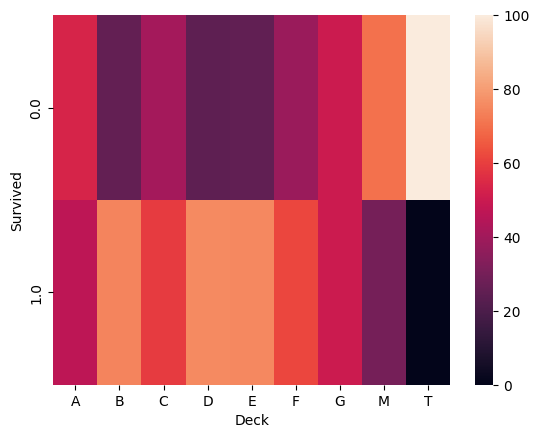

In [142]:
sns.heatmap(pd.crosstab(df["Survived"], df["Deck"], normalize="columns") * 100)

<Axes: xlabel='Survived'>

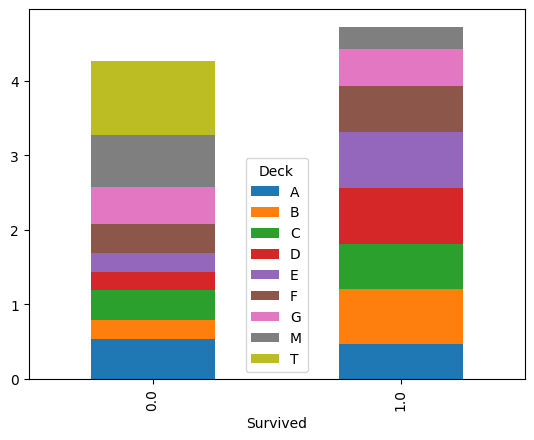

In [143]:
pd.crosstab(df["Survived"], df["Deck"], normalize="columns").plot(
    kind="bar", stacked=True
)

<Axes: xlabel='Deck'>

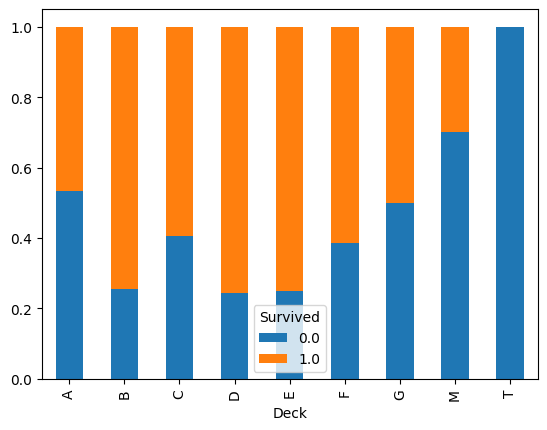

In [144]:
pd.crosstab(df["Deck"], df["Survived"], normalize="index").plot(
    kind="bar", stacked=True
)

<Axes: >

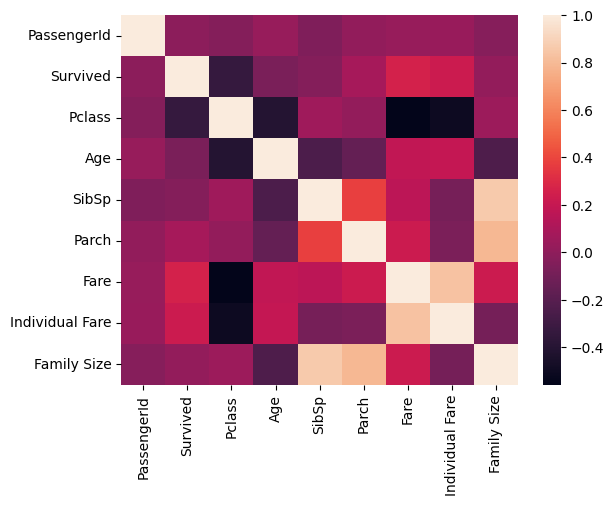

In [151]:
sns.heatmap(df.corr(numeric_only=True))

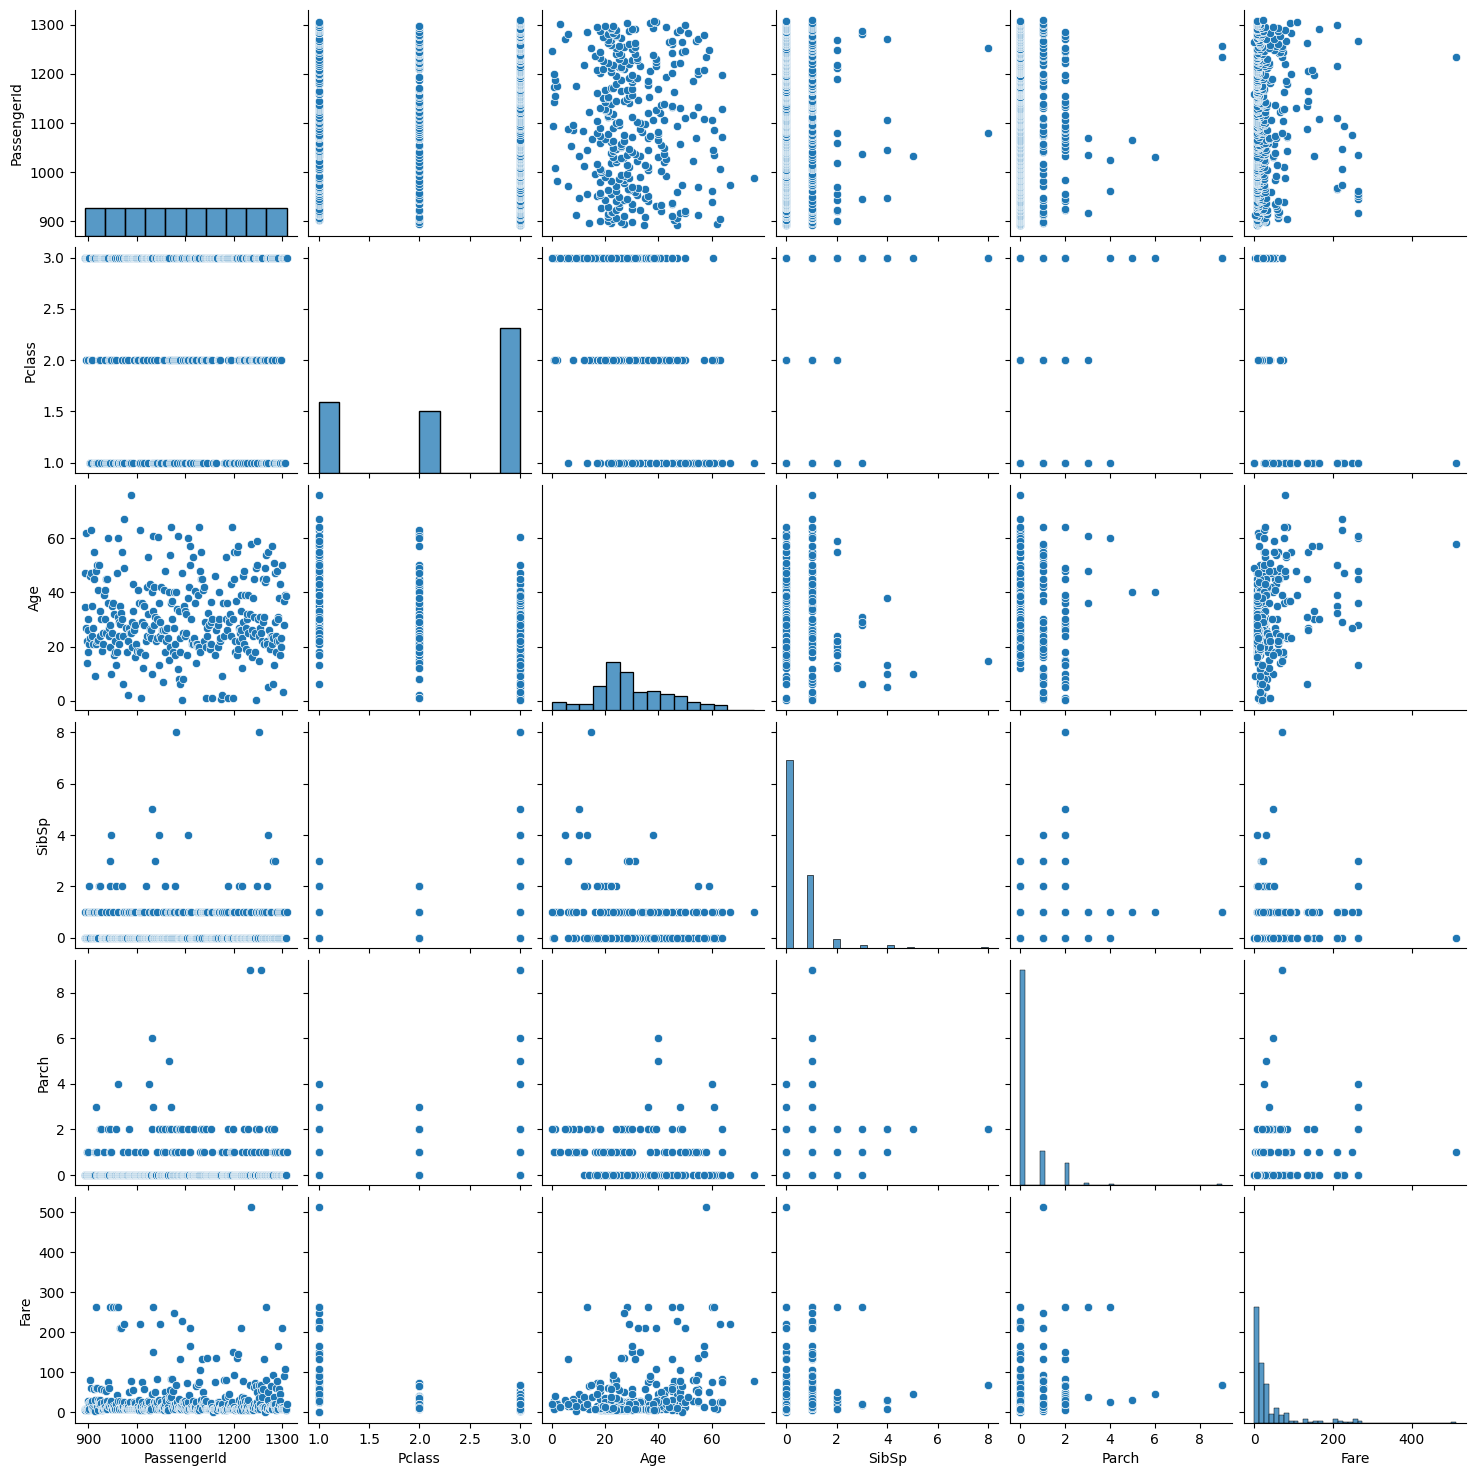

In [149]:
sns.pairplot(df2)